In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import seaborn as sns
from pypfopt import plotting
from importlib import reload

reload(plotting)

<module 'pypfopt.plotting' from '/Users/noahforougi/Library/Caches/pypoetry/virtualenvs/portfolio-optimization-_HjJy9gg-py3.10/lib/python3.10/site-packages/pypfopt/plotting.py'>

In [19]:
prices = (
    pd.read_csv("../data/prices.csv")
    .rename(columns=str.lower)
    .assign(date=lambda x: pd.to_datetime(x.date))
    .set_index("date")
)
prices

,amzn,cost,ko,ma,msft
date,,,,,
1995-01-03,NaN,4.335104,6.288176,NaN,2.323634
1995-01-04,NaN,4.419282,6.151476,NaN,2.340524
1995-01-05,NaN,4.208842,6.121098,NaN,2.301918
1995-01-06,NaN,4.208842,6.121098,NaN,2.340524
1995-01-09,NaN,4.208842,6.029965,NaN,2.326046
...,...,...,...,...,...
2023-12-22,153.419998,654.652466,57.857216,422.846954,373.215424
2023-12-26,153.410004,657.596313,58.095314,422.418243,373.295135
2023-12-27,153.339996,664.754272,58.244122,423.106140,372.707275


# Efficient Frontier 

- Compute the efficient frontier 
    - Do with PyPortfolioOpt 
    - Do manually 
- Add the Max Sharpe portfolio


In [22]:
sample_cov = risk_models.sample_cov(prices, frequency=252)
mu = expected_returns.mean_historical_return(prices, frequency=252)
ef = EfficientFrontier(mu, sample_cov)

<Axes: xlabel='Volatility', ylabel='Return'>

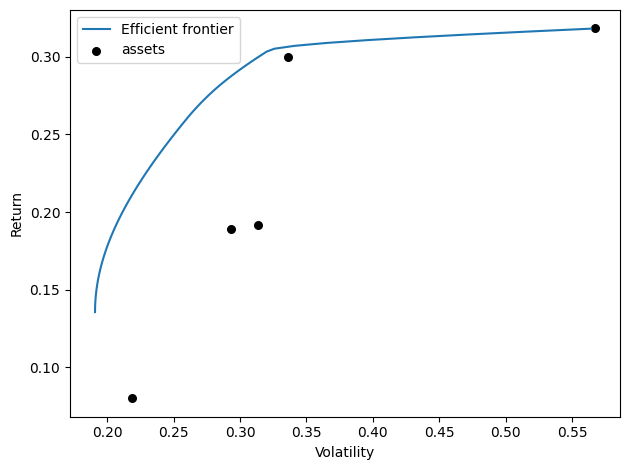

In [23]:
plotting.plot_efficient_frontier(ef)

# Enhancing Inputs for MVO

#### 1. Using RF for Expected Returns 

#### 2. Using XGBoost for Expected Returns

# Efficient Frontier with Varying Inputs